In [160]:
import skxray.speckle_visibility.speckle_visibility as spe_vis
import skxray.roi as roi
import skxray.correlation as corr
import skxray.core as core

import numpy as np
import os, sys

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import LogNorm

In [162]:
data_dir = "/Volumes/Data/BeamLines/CHX/Luxi_description_files_for_duke/duke_cc_12C/"
duke_ndata = np.load(data_dir+"duke_img_1_5000.npy")
duke_dark = np.load(data_dir+"duke_dark.npy")

duke_data = []
for i in range(duke_ndata.shape[0]):
    duke_data.append(duke_ndata[i] - duke_dark)
    
duke_data=np.asarray(duke_data)

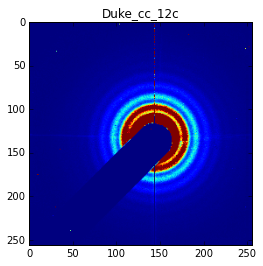

In [163]:
sum_img = np.average(duke_data, axis=0)
plt.imshow(sum_img, vmax=1e0)
plt.title("Duke_cc_12c")
plt.show()

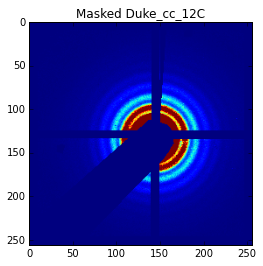

In [164]:
mask = ~np.load("/Volumes/Data/BeamLines/CHX/Luxi_description_files_for_duke/Luxi_duke_mask.npy")
flat_field = np.load("/Volumes/Data/BeamLines/CHX/Luxi_description_files_for_duke/Luxi_duke_flat.npy")

plt.imshow(mask*sum_img, vmax=1e0)
plt.title("Masked Duke_cc_12C")
plt.show()

In [165]:
inner_radius = 36
width = 2
spacing = 1
num_rings = 5
center = (133, 143)

edges = roi.ring_edges(inner_radius, width, spacing, num_rings)

rings = roi.rings(edges, center, sum_img.shape)

def test_demo(ax, label_array, img_dim, image):
    """
    This will plot the reqiured roi's on the image
    """

    vmin, vmax = np.percentile(image, [100, 100])
    #im = ax.imshow(tt.reshape(*img_dim), cmap='Paired', interpolation='nearest')
    im = ax.imshow(image, interpolation='none', norm=LogNorm(), vmax=1e0)
    im = ax.imshow(label_array, interpolation='none', norm=LogNorm())
    #im = ax.imshow(image, interpolation='none',  vmax=1e0)

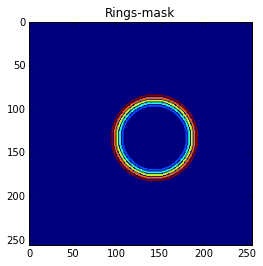

In [166]:
plt.imshow(rings)
plt.title("Rings-mask")
plt.show()

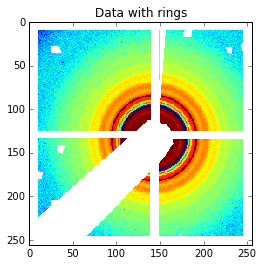

In [167]:
fig, ax = plt.subplots()
plt.title("Data with rings")
test_demo(ax, rings*mask, sum_img.shape, sum_img*mask)
plt.show()

In [174]:
mask_data1 = mask*duke_data[0:2655]
mask_data2 = mask*duke_data[2659:4999]

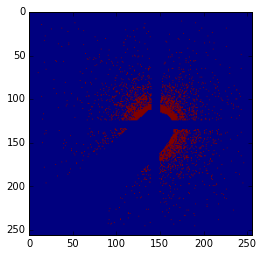

In [175]:
plt.imshow(mask_data1[500], vmax=1e0)
plt.show()

In [190]:
img_array1 = np.nditer(mask_data1) 
img_array2 = np.nditer(mask_data2)

sample_dict = {1:img_array1, 2: img_array2}

In [177]:
rings_mask = rings*mask
max_cts = spe_vis.max_counts(sample_dict, rings_mask)

In [178]:
max_cts

13

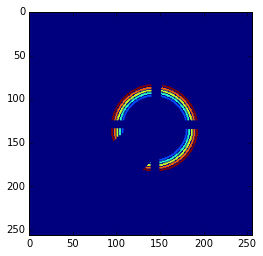

In [179]:
plt.imshow(rings_mask)

In [180]:
edges

array([[ 36.,  38.],
       [ 39.,  41.],
       [ 42.,  44.],
       [ 45.,  47.],
       [ 48.,  50.]])

In [120]:
int_dist = spe_vis.intensity_distribution(sum_img*mask, rings*mask)

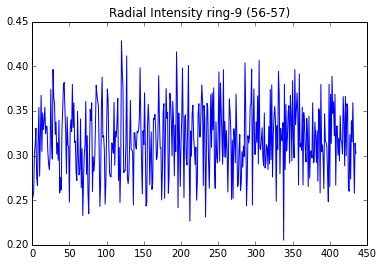

In [123]:
plt.plot(int_dist.values()[4])
plt.title("Radial Intensity ring-5 (48.- 50.)")
plt.show()

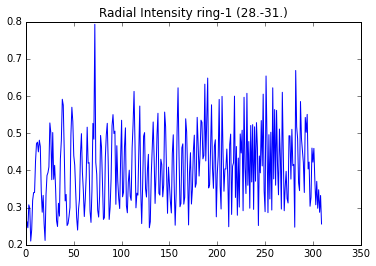

In [124]:
plt.plot(int_dist.values()[1])
plt.title("Radial Intensity ring-2 (39.- 41.)")
plt.show()

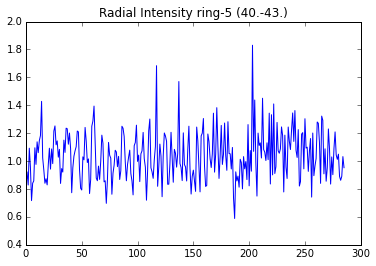

In [125]:
plt.plot(int_dist.values()[0])
plt.title("Radial Intensity ring-5 (36.-38.)")
plt.show()

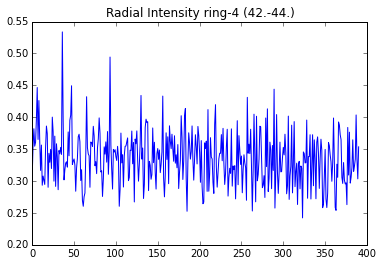

In [127]:
plt.plot(int_dist.values()[3])
plt.title("Radial Intensity ring-4 (42.-44.)")
plt.show()

In [181]:
average_intensity = spe_vis.static_tests_one_label(img_array1, rings_mask, num=1)

In [182]:
avg_test = spe_vis.static_test(img_array1, rings_mask)

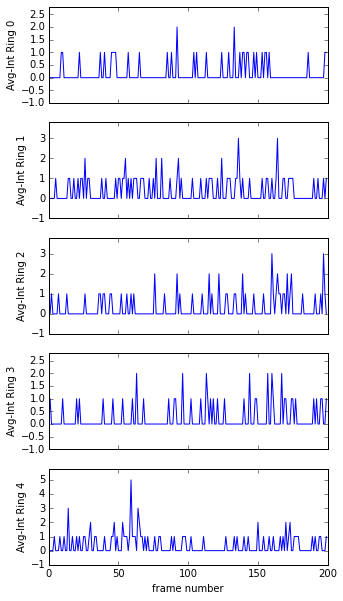

In [183]:
fig, axes = plt.subplots(num_rings, sharex=True, figsize=(5,10))
axes[num_rings-1].set_xlabel("frame number")
for i in range(num_rings):
    axes[i].set_ylabel("Avg-Int Ring "+str(i))
    axes[i].plot(avg_test.values()[i][:200])
    axes[i].set_ylim(bottom=-1.0, top=(np.max(avg_test.values()[i][:200])+0.8))
plt.show()    

    

In [184]:
bin_cen, ring_avg = spe_vis.circular_average(sum_img*mask, center, thershold=0, nx=100, pixel_size=(0.1, 0.1))

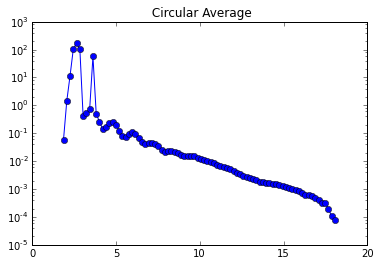

In [185]:

plt.title(" Circular Average")
plt.semilogy(bin_cen,ring_avg, '-o')
plt.show()

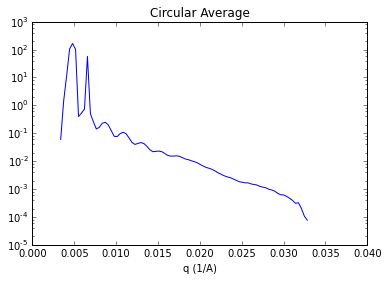

In [186]:
dist_sample = 2230 # mm

two_theta = core.radius_to_twotheta(dist_sample, bin_cen)
wavelength = 1.5498

q_val = core.twotheta_to_q(two_theta, wavelength)
plt.title("Circular Average")
plt.xlabel("q (1/A)")
plt.semilogy(q_val, ring_avg)

plt.show()

In [191]:
num_rings = 1

edges_1 = roi.ring_edges(inner_radius, width, spacing, num_rings)

label_array = roi.rings(edges_1, center, sum_img.shape)

average_intensity_sets, combine_averages = spe_vis.static_test_sets_one_label(sample_dict, label_array, num=1)

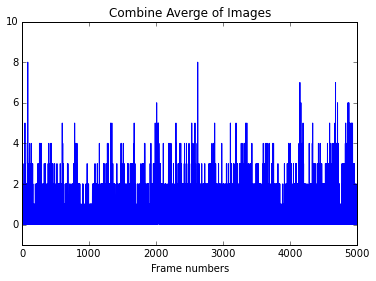

In [194]:
plt.plot(combine_averages)
plt.title("Combine Averge of Images")
plt.xlabel("Frame numbers")
plt.ylim(-1, 10)
plt.show()